In [1]:
#necessary packages:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data
data = pd.ExcelFile("KPMGfinal.xlsx")

In [3]:
#separtly reading the sheets
Transactions = pd.read_excel(data, 'Transactions')
NewCustomerList = pd.read_excel(data, 'NewCustomerList')
CustomerDemographic = pd.read_excel(data, 'CustomerDemographic')
CustomerAddress = pd.read_excel(data, 'CustomerAddress')

# 1. Exploring CustomerDemographic data

In [4]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [5]:
print("The dimesion of the data is ",CustomerDemographic.shape)

The dimesion of the data is  (4000, 13)


In [6]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [7]:
CustomerDemographic.drop(['default'],axis = 1,inplace = True)

In [8]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [9]:
CustomerDemographic.nunique()

customer_id                            4000
first_name                             3139
last_name                              3725
gender                                    6
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [10]:
CustomerDemographic['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [11]:
CustomerDemographic['gender'] =CustomerDemographic['gender'].replace('F','Female').replace('Femal','Female').replace('M','Male').replace('U','Unspecific')

In [12]:
CustomerDemographic['gender'].value_counts()

Female        2039
Male          1873
Unspecific      88
Name: gender, dtype: int64

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='gender', ylabel='count'>

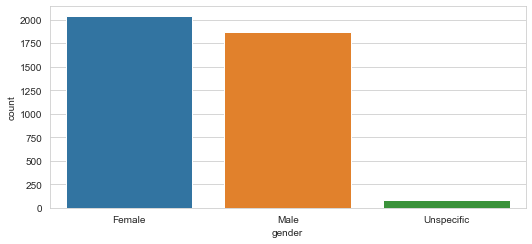

In [14]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.set_style("whitegrid")
ax= sns.countplot(x=CustomerDemographic["gender"])
ax

In [15]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [16]:
CustomerDemographic.duplicated().any()

False

In [17]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [18]:
#dropping null values from DOB
CustomerDemographic = CustomerDemographic.dropna(subset=['DOB'])
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              497
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
dtype: int64

In [19]:
import datetime as DT
now = pd.Timestamp('now')

In [20]:
#new column age
CustomerDemographic['DOB'] = CustomerDemographic['DOB'].where(CustomerDemographic['DOB'] < now, CustomerDemographic['DOB'] -  np.timedelta64(100, 'Y'))  
CustomerDemographic['Age'] = (now - CustomerDemographic['DOB']).astype('<m8[Y]')   

In [21]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,68.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,61.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,45.0


In [22]:
print("The minimum age of the customers",min(CustomerDemographic['Age']))
print("The maximum age of the customers",max(CustomerDemographic['Age']))

The minimum age of the customers 20.0
The maximum age of the customers 179.0


In [23]:
a = CustomerDemographic.groupby(by='gender')['past_3_years_bike_related_purchases'].sum().reset_index()
a

,gender,past_3_years_bike_related_purchases
0,Female,98359
1,Male,93483
2,Unspecific,59


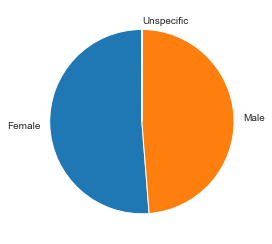

In [24]:
plt.pie(a['past_3_years_bike_related_purchases'], labels = a['gender'],startangle = 90)
plt.show() 

In [25]:
b = CustomerDemographic['job_industry_category'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
b

Manufacturing         24.4%
Financial Services    23.5%
Health                18.3%
Retail                11.0%
Property               8.2%
IT                     4.7%
Entertainment          4.2%
Argiculture            3.5%
Telecommunications     2.2%
Name: job_industry_category, dtype: object

In [26]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3913 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3913 non-null   int64         
 1   first_name                           3913 non-null   object        
 2   last_name                            3792 non-null   object        
 3   gender                               3913 non-null   object        
 4   past_3_years_bike_related_purchases  3913 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3416 non-null   object        
 7   job_industry_category                3257 non-null   object        
 8   wealth_segment                       3913 non-null   object        
 9   deceased_indicator                   3913 non-null   object        
 10  owns_car    

In [27]:
CustomerDemographic.nunique()

customer_id                            3913
first_name                             3079
last_name                              3647
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
Age                                      56
dtype: int64

In [28]:
Label= []
for row in CustomerDemographic['Age']:
    if(row<=29):
        Label.append("20-30")
    elif(row<=39):
        Label.append("30-40")
    elif row<=49:
        Label.append("40-50")
    elif row<=59:
        Label.append("50-60")
    elif row<=69:
        Label.append("60-70")
    elif row<=79:
        Label.append("70-80")
    else:
        Label.append("80+")

In [29]:
CustomerDemographic['Label'] = Label
CustomerDemographic

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Label
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0,60-70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,68.0,60-70
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,61.0,60-70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,45.0,40-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,3995,Rusty,Iapico,Male,93,1975-12-12,Staff Scientist,Manufacturing,Mass Customer,N,Yes,14.0,47.0,40-50
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0,47.0,40-50
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0,21.0,20-30
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0,49.0,40-50


<AxesSubplot:>

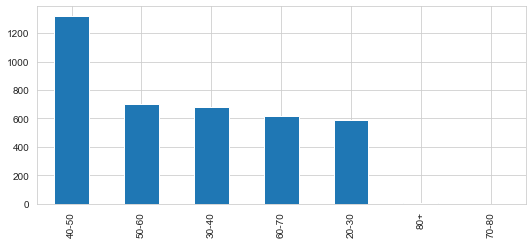

In [30]:
CustomerDemographic['Label'].value_counts(sort= True).plot(kind = 'bar')

In [31]:
CustomerDemographic['wealth_segment'].value_counts()

Mass Customer        1954
High Net Worth        996
Affluent Customer     963
Name: wealth_segment, dtype: int64

In [32]:
import plotly.express as px

In [33]:
c =CustomerDemographic.groupby(['wealth_segment','Label']).size().reset_index(name='counts')
c

,wealth_segment,Label,counts
0,Affluent Customer,20-30,160
1,Affluent Customer,30-40,161
2,Affluent Customer,40-50,317
3,Affluent Customer,50-60,182
4,Affluent Customer,60-70,140
5,Affluent Customer,70-80,1
6,Affluent Customer,80+,2
7,High Net Worth,20-30,143
8,High Net Worth,30-40,177
9,High Net Worth,40-50,342


<AxesSubplot:xlabel='Label', ylabel='counts'>

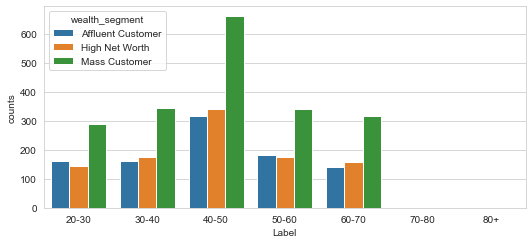

In [34]:
sns.barplot(data=c, x="Label", y="counts", hue="wealth_segment")

In [35]:
CustomerDemographic.nunique()

customer_id                            3913
first_name                             3079
last_name                              3647
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                    3448
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
Age                                      56
Label                                     7
dtype: int64

In [36]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Label
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0,60-70
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,68.0,60-70
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,61.0,60-70
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,45.0,40-50


In [37]:
CustomerAddress.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [38]:
CustomerAddress['state'] = CustomerAddress['state'].replace('Victoria','VIC').replace('New South Wales','NSW')

In [39]:
#new dataframe by merging
new = pd.merge(CustomerDemographic, CustomerAddress, on="customer_id")
new.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Age,Label,address,postcode,state,country,property_valuation
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,69.0,60-70,060 Morning Avenue,2016,NSW,Australia,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,42.0,40-50,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0,61.0,60-70,0 Holy Cross Court,4211,QLD,Australia,9
3,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0,45.0,40-50,17979 Del Mar Point,2448,NSW,Australia,4
4,6,Curr,Duckhouse,Male,35,1966-09-16,NaN,Retail,High Net Worth,N,Yes,13.0,56.0,50-60,9 Oakridge Court,3216,VIC,Australia,9


In [40]:
new.isnull().sum()

customer_id                              0
first_name                               0
last_name                              121
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              495
job_industry_category                  655
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
Age                                      0
Label                                    0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

In [41]:
new['owns_car'].value_counts()

Yes    1971
No     1938
Name: owns_car, dtype: int64

In [42]:
new['state'].value_counts()

NSW    2089
VIC     998
QLD     822
Name: state, dtype: int64

In [43]:
d =new.groupby(['state','owns_car']).size().reset_index(name='counts')
d

,state,owns_car,counts
0,NSW,No,1017
1,NSW,Yes,1072
2,QLD,No,412
3,QLD,Yes,410
4,VIC,No,509
5,VIC,Yes,489


<AxesSubplot:xlabel='state', ylabel='counts'>

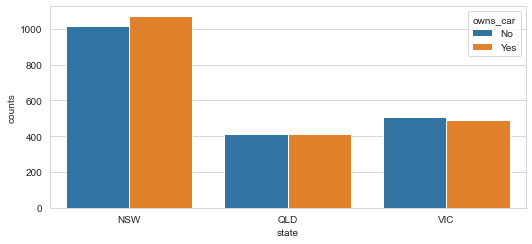

In [44]:
sns.barplot(data=d, x="state", y="counts", hue="owns_car")

<AxesSubplot:xlabel='counts', ylabel='job_industry_category'>

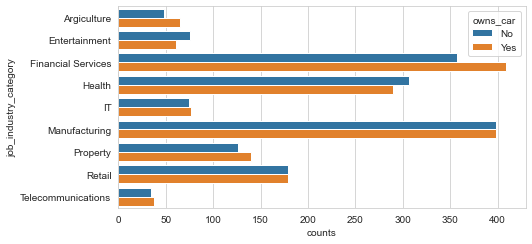

In [45]:
e =new.groupby(['job_industry_category','owns_car']).size().reset_index(name='counts')
sns.barplot(data=e, y="job_industry_category", x="counts", hue="owns_car")